In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Define the classes
classes = [
    "Person",
    "hard-hat",
    "gloves",
    "mask",
    "glasses",
    "boots",
    "vest",
    "ppe-suit",
    "ear-protector",
    "safety-harness"
]

# Specify the file path
classes_file_path = "/content/drive/MyDrive/datasets/classes.txt"

# Write the classes to the file
with open(classes_file_path, 'w') as f:
    for class_name in classes:
        f.write(f"{class_name}\n")

print(f"classes.txt has been created at {classes_file_path}")


classes.txt has been created at /content/drive/MyDrive/datasets/classes.txt


In [ ]:
import os
import random
import shutil

def split_dataset(images_dir, labels_dir, output_dir, train_ratio=0.8):
    # Create directories for train and val sets
    train_images_dir = os.path.join(output_dir, 'images', 'train')
    val_images_dir = os.path.join(output_dir, 'images', 'val')
    train_labels_dir = os.path.join(output_dir, 'labels', 'train')
    val_labels_dir = os.path.join(output_dir, 'labels', 'val')

    os.makedirs(train_images_dir, exist_ok=True)
    os.makedirs(val_images_dir, exist_ok=True)
    os.makedirs(train_labels_dir, exist_ok=True)
    os.makedirs(val_labels_dir, exist_ok=True)

    # List all images and annotations
    all_images = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]
    all_labels = [f for f in os.listdir(labels_dir) if f.endswith('.txt')]

    # Ensure each image has a corresponding annotation file
    data = [(img, img.replace('.jpg', '.txt')) for img in all_images if img.replace('.jpg', '.txt') in all_labels]

    # Check for missing files
    missing_labels = [img for img in all_images if img.replace('.jpg', '.txt') not in all_labels]
    missing_images = [lbl for lbl in all_labels if lbl.replace('.txt', '.jpg') not in all_images]

    if missing_labels:
        print(f"Missing labels for images: {missing_labels}")
    if missing_images:
        print(f"Missing images for labels: {missing_images}")

    # Shuffle and split the data
    random.seed(42)
    random.shuffle(data)
    split_idx = int(len(data) * train_ratio)
    train_data = data[:split_idx]
    val_data = data[split_idx:]

    # Move files to train and val directories
    for img_file, label_file in train_data:
        shutil.copy(os.path.join(images_dir, img_file), os.path.join(train_images_dir, img_file))
        shutil.copy(os.path.join(labels_dir, label_file), os.path.join(train_labels_dir, label_file))

    for img_file, label_file in val_data:
        shutil.copy(os.path.join(images_dir, img_file), os.path.join(val_images_dir, img_file))
        shutil.copy(os.path.join(labels_dir, label_file), os.path.join(val_labels_dir, label_file))

    print(f"Training set: {len(train_data)} images and labels")
    print(f"Validation set: {len(val_data)} images and labels")

# Paths (replace with your actual paths)
images_dir = '/content/drive/MyDrive/datasets/images'
labels_dir = '/content/drive/MyDrive/datasets/Yoloformat'
output_dir = '/content/drive/MyDrive/datasets'

# Split the dataset
split_dataset(images_dir, labels_dir, output_dir)


In [4]:
import yaml

def create_person_ppe_yaml_file(train_images_dir, val_images_dir, output_yaml_path):
    data = {
        'train': train_images_dir,
        'val': val_images_dir,
        'nc': 10,
        'names': [
            'person', 'hard-hat', 'gloves', 'mask', 'glasses',
            'boots', 'vest', 'ppe-suit', 'ear-protector', 'safety-harness'
        ]
    }

    with open(output_yaml_path, 'w') as yaml_file:
        yaml.dump(data, yaml_file, default_flow_style=False)

    print(f"YAML file created at: {output_yaml_path}")

# Paths (replace with your actual paths)
train_images_dir = '/content/drive/MyDrive/datasets/images/train'
val_images_dir = '/content/drive/MyDrive/datasets/images/val'
output_yaml_path = '/content/drive/MyDrive/datasets/person_ppe.yaml'

# Create the YAML file
create_person_ppe_yaml_file(train_images_dir, val_images_dir, output_yaml_path)




YAML file created at: /content/drive/MyDrive/datasets/person_ppe.yaml


In [6]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.2/757.2 kB 6.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from ultralytics import YOLO

# Initialize YOLOv8 model
model = YOLO('yolov8n.pt')  # or yolov8s.pt, yolov8m.pt, etc.

# Path to your YAML file
yaml_path = '/content/drive/MyDrive/datasets/person_ppe.yaml'

# Train the model on the dataset
model.train(
    data=yaml_path,  # Path to your combined YAML file
    epochs=100,
    imgsz=640,
    batch=16,
    name='person_ppe_detection_model',
    verbose=True  # Enable verbose logging for more insights
)

# Save the trained weights
model.save('/content/drive/MyDrive/datasets/weights/person_ppe_detection_model.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 22.7MB/s]


Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/datasets/person_ppe.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=person_ppe_detection_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

100%|██████████| 755k/755k [00:00<00:00, 4.66MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/datasets/labels/train... 331 images, 16 backgrounds, 1 corrupt: 100%|██████████| 332/332 [01:26<00:00,  3.86it/s]

train: WARNING ⚠️ /content/drive/MyDrive/datasets/images/train/00977_jpg.rf.f95b8f2a8ddd0df6ee5f56d665ebbb55.jpg: ignoring corrupt image/label: cannot identify image file '/content/drive/MyDrive/datasets/images/train/00977_jpg.rf.f95b8f2a8ddd0df6ee5f56d665ebbb55.jpg'


train: New cache created: /content/drive/MyDrive/datasets/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/datasets/labels/val.cache... 84 images, 6 backgrounds, 71 corrupt: 100%|██████████| 84/84 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/datasets/images/val/-1832-_png_jpg.rf.d56cb4edba4c059bdfa7f2c581d26a19.jpg: ignoring corrupt image/label: Label class 5 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /content/drive/MyDrive/datasets/images/val/-184-_png_jpg.rf.b02963998a79b9ad5079f57b65130bc2.jpg: ignoring corrupt image/label: Label class 5 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /content/drive/MyDrive/datasets/images/val/-2391-_png_jpg.rf.8781d03c5c7efeeb7fdaeb65e1dd0fc7.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /content/drive/MyDrive/datasets/images/val/-4379-_png_jpg.rf.03c410bbf91f791a4bade1f8673fa79c.jpg: ignoring corrupt image/label: Label class 5 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /content/drive/MyDrive/datasets/images/val/001003.jpg: ignoring corrupt image/label: Label class 7 exceed

Plotting labels to runs/detect/person_ppe_detection_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/person_ppe_detection_model
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.511       4.19      1.284        145        640: 100%|██████████| 21/21 [05:18<00:00, 15.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:12<00:00, 12.42s/it]

                   all         13         18     0.0226        0.5      0.133     0.0825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.404      2.679      1.134         97        640: 100%|██████████| 21/21 [05:11<00:00, 14.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.07s/it]

                   all         13         18     0.0388          1      0.809      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.349      2.179      1.117        105        640: 100%|██████████| 21/21 [05:00<00:00, 14.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.95s/it]

                   all         13         18          1      0.422      0.891      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.314      1.824      1.096        111        640: 100%|██████████| 21/21 [05:01<00:00, 14.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.98s/it]

                   all         13         18      0.672      0.611      0.737      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.337      1.741      1.107        132        640: 100%|██████████| 21/21 [05:03<00:00, 14.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.56s/it]

                   all         13         18      0.876      0.667      0.814      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      1.302       1.65      1.094         94        640: 100%|██████████| 21/21 [05:04<00:00, 14.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.66s/it]

                   all         13         18      0.894      0.722      0.794      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      1.245      1.563      1.082        141        640: 100%|██████████| 21/21 [05:01<00:00, 14.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.09s/it]

                   all         13         18      0.756      0.778      0.787       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      1.229      1.504      1.059        173        640: 100%|██████████| 21/21 [05:01<00:00, 14.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.67s/it]

                   all         13         18      0.873      0.764      0.885      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      1.206      1.497      1.066        132        640: 100%|██████████| 21/21 [05:00<00:00, 14.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.53s/it]

                   all         13         18      0.937      0.825      0.915      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      1.221      1.438      1.069        194        640: 100%|██████████| 21/21 [04:55<00:00, 14.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.65s/it]

                   all         13         18      0.933      0.775       0.88       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      1.173      1.354      1.046        148        640: 100%|██████████| 21/21 [04:54<00:00, 14.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]

                   all         13         18       0.99      0.778      0.937      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      1.167      1.366      1.039        140        640: 100%|██████████| 21/21 [04:56<00:00, 14.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.50s/it]

                   all         13         18      0.928      0.889      0.948      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      1.213      1.345       1.05        135        640: 100%|██████████| 21/21 [04:56<00:00, 14.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.92s/it]

                   all         13         18      0.882      0.828      0.918      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      1.207      1.323      1.039         77        640: 100%|██████████| 21/21 [04:56<00:00, 14.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.49s/it]

                   all         13         18      0.914      0.889      0.955      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      1.199       1.29      1.047        151        640: 100%|██████████| 21/21 [05:00<00:00, 14.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.20s/it]

                   all         13         18          1      0.832      0.963      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      1.117      1.206       1.03        124        640: 100%|██████████| 21/21 [04:54<00:00, 14.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.46s/it]

                   all         13         18      0.847          1      0.952      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      1.136      1.203      1.022        131        640: 100%|██████████| 21/21 [04:55<00:00, 14.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.47s/it]

                   all         13         18      0.875          1      0.975      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      1.089      1.175      1.015        106        640: 100%|██████████| 21/21 [04:56<00:00, 14.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.77s/it]

                   all         13         18          1      0.884      0.984      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G      1.139      1.136      1.012        154        640: 100%|██████████| 21/21 [04:54<00:00, 14.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.47s/it]

                   all         13         18          1      0.936       0.99      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G      1.105       1.12      1.004         85        640: 100%|██████████| 21/21 [04:58<00:00, 14.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.25s/it]

                   all         13         18          1      0.933      0.977      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      1.111       1.11      0.995        176        640: 100%|██████████| 21/21 [04:56<00:00, 14.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.49s/it]

                   all         13         18      0.939      0.944      0.969      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G      1.119      1.118      1.017         87        640: 100%|██████████| 21/21 [04:59<00:00, 14.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.77s/it]

                   all         13         18      0.882      0.832      0.941      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G      1.144      1.095      1.016        108        640: 100%|██████████| 21/21 [04:54<00:00, 14.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.51s/it]

                   all         13         18          1      0.866      0.979      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      1.055      1.027      1.005        109        640:  14%|█▍        | 3/21 [00:44<04:24, 14.71s/it]

In [9]:
import os
import cv2
import numpy as np
from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO('/content/drive/MyDrive/datasets/best.pt')  # Path to the trained combined model

# Function to perform inference
def perform_inference(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for image_file in os.listdir(input_dir):
        if image_file.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(input_dir, image_file)
            image = cv2.imread(image_path)

            # Perform detection
            results = model(image)
            detections = results[0].boxes.xyxy  # Extract the bounding boxes
            confidences = results[0].boxes.conf  # Extract the confidences
            labels = results[0].boxes.cls  # Extract the class labels

            # Process each detection
            for i in range(len(detections)):
                x1, y1, x2, y2 = map(int, detections[i])
                confidence = float(confidences[i])
                label = int(labels[i])

                # Draw bounding boxes and labels
                color = (0, 255, 0) if label != 0 else (255, 0, 0)  # Green for PPE, Blue for person
                label_name = model.names[label]

                cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
                cv2.putText(image, f'{label_name}: {confidence:.2f}', (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

                # Crop and process the person region for PPE detection if it's a person
                if label == 0:  # Assuming 'person' class is labeled as 0
                    person_crop = image[y1:y2, x1:x2]
                    ppe_results = model(person_crop)
                    ppe_detections = ppe_results[0].boxes.xyxy  # Extract the bounding boxes for PPE
                    ppe_confidences = ppe_results[0].boxes.conf  # Extract the confidences for PPE
                    ppe_labels = ppe_results[0].boxes.cls  # Extract the class labels for PPE

                    for j in range(len(ppe_detections)):
                        px1, py1, px2, py2 = map(int, ppe_detections[j])
                        ppe_confidence = float(ppe_confidences[j])
                        ppe_label = int(ppe_labels[j])

                        # Draw bounding boxes for PPE detection
                        cv2.rectangle(person_crop, (px1, py1), (px2, py2), (0, 255, 0), 2)
                        cv2.putText(person_crop, f'{model.names[ppe_label]}: {ppe_confidence:.2f}', (px1, py1 - 10),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

                    # Replace the cropped region in the original image with annotated crop
                    image[y1:y2, x1:x2] = person_crop

            # Save the output image
            output_path = os.path.join(output_dir, image_file)
            cv2.imwrite(output_path, image)
            print(f'Saved inference result for {image_file} to {output_path}')

# Define input and output directories
input_directory = '/content/drive/MyDrive/datasets/images'  # Replace with the actual path to your input images
output_directory = '/content/drive/MyDrive/datasets/output'  # Replace with the actual path to your output directory

# Perform inference
perform_inference(input_directory, output_directory)



0: 640x640 4 hard-hats, 269.4ms
Speed: 5.4ms preprocess, 269.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Saved inference result for 01338_jpg.rf.e142346c853fbd92e2340e43eb30eecf.jpg to /content/drive/MyDrive/datasets/output/01338_jpg.rf.e142346c853fbd92e2340e43eb30eecf.jpg

0: 480x640 1 hard-hat, 4 bootss, 187.1ms
Speed: 15.7ms preprocess, 187.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Saved inference result for 001725.jpg to /content/drive/MyDrive/datasets/output/001725.jpg

0: 640x640 1 hard-hat, 2 glovess, 2 bootss, 2 vests, 235.9ms
Speed: 3.0ms preprocess, 235.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Saved inference result for Video2_91_jpg.rf.faca99c76175b53a646f60aa1abc4b14.jpg to /content/drive/MyDrive/datasets/output/Video2_91_jpg.rf.faca99c76175b53a646f60aa1abc4b14.jpg

0: 512x640 2 hard-hats, 5 glovess, 207.5ms
Speed: 3.8ms preprocess, 207.5ms inference, 1.0ms postprocess per image at shape (1, 3,


0: 640x224 1 person, 97.6ms
Speed: 4.0ms preprocess, 97.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 224)

0: 640x224 1 hard-hat, 2 bootss, 91.1ms
Speed: 2.8ms preprocess, 91.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 224)


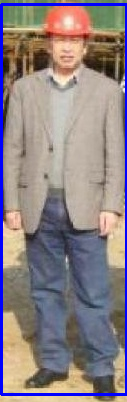

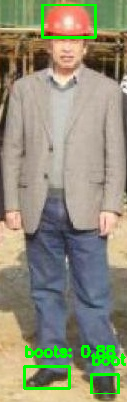

In [25]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# Load the YOLOv8 model for person detection
person_model = YOLO('/content/drive/MyDrive/datasets/yolov8n.pt')  # Path to the YOLOv8 model for person detection

# Load the custom YOLO model for PPE detection
ppe_model = YOLO('/content/drive/MyDrive/datasets/best.pt')  # Path to the trained model for PPE detection

# Function to perform detection on an image using a specified model
def detect_objects(image, model):
    results = model(image)
    detections = results[0].boxes.xyxy.cpu().numpy()  # Extract the bounding boxes
    confidences = results[0].boxes.conf.cpu().numpy()  # Extract the confidences
    labels = results[0].boxes.cls.cpu().numpy()  # Extract the class labels
    return detections, confidences, labels

# Function to draw detections on an image
def draw_detections(image, detections, confidences, labels, model):
    for i in range(len(detections)):
        x1, y1, x2, y2 = map(int, detections[i])
        confidence = float(confidences[i])
        label = int(labels[i])

        color = (0, 255, 0) if label != 0 else (255, 0, 0)  # Green for PPE, Blue for person
        label_name = model.names[label]

        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, f'{label_name}: {confidence:.2f}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return image

# Function to perform person detection and then PPE detection on the detected persons
def process_images(person_image_path, ppe_image_path):
    person_image = cv2.imread(person_image_path)
    ppe_image = cv2.imread(ppe_image_path)

    # Person Detection using the person_model
    person_detections, person_confidences, person_labels = detect_objects(person_image, person_model)
    person_image_annotated = draw_detections(person_image, person_detections, person_confidences, person_labels, person_model)

    # Process each detected person for PPE detection using the ppe_model
    for i in range(len(person_detections)):
        x1, y1, x2, y2 = map(int, person_detections[i])
        label = int(person_labels[i])

        if label == 0:  # Assuming 'person' class is labeled as 0 in person_model
            # Crop the person region from the PPE image
            person_crop = ppe_image[y1:y2, x1:x2]

            # PPE Detection on the cropped person image using the ppe_model
            ppe_detections, ppe_confidences, ppe_labels = detect_objects(person_crop, ppe_model)
            person_crop_annotated = draw_detections(person_crop, ppe_detections, ppe_confidences, ppe_labels, ppe_model)

            # Replace the cropped region in the original PPE image with annotated crop
            ppe_image[y1:y2, x1:x2] = person_crop_annotated

    return person_image_annotated, ppe_image

person_image_path = '/content/drive/MyDrive/datasets/cropped_2.jpg'  # Replace with the actual path to your person detection image
ppe_image_path = '/content/drive/MyDrive/datasets/cropped_2.jpg' # Replace with the actual path to your PPE detection image

# Perform detection
person_result, ppe_result = process_images(person_image_path, ppe_image_path)

# Display the results
cv2_imshow(person_result)
cv2_imshow(ppe_result)




0: 640x640 3 persons, 290.6ms
Speed: 5.0ms preprocess, 290.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


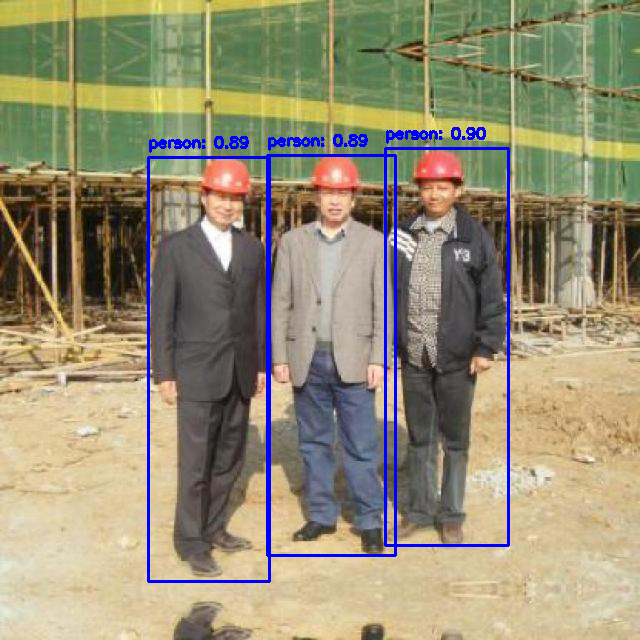

In [17]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# Load the YOLOv8 model for person detection
person_model = YOLO('/content/drive/MyDrive/datasets/yolov8n.pt')  # Path to the YOLOv8 model for person detection

# Function to perform person detection
def detect_persons(image, model):
    results = model(image)
    detections = results[0].boxes.xyxy.cpu().numpy()  # Extract the bounding boxes
    confidences = results[0].boxes.conf.cpu().numpy()  # Extract the confidences
    labels = results[0].boxes.cls.cpu().numpy()  # Extract the class labels
    return detections, confidences, labels

# Function to draw detections on an image
def draw_detections(image, detections, confidences, labels, model):
    for i in range(len(detections)):
        x1, y1, x2, y2 = map(int, detections[i])
        confidence = float(confidences[i])
        label = int(labels[i])

        color = (0, 255, 0) if label != 0 else (255, 0, 0)  # Green for PPE, Blue for person
        label_name = model.names[label]

        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, f'{label_name}: {confidence:.2f}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return image

# Define path for person detection image
person_image_path = '/content/drive/MyDrive/datasets/whole_image.jpg'  # Replace with the actual path to your person detection image

# Perform person detection
try:
    person_image = cv2.imread(person_image_path)
    if person_image is None:
        raise ValueError(f"Failed to load image at {person_image_path}")

    person_detections, person_confidences, person_labels = detect_persons(person_image, person_model)
    person_result = draw_detections(person_image, person_detections, person_confidences, person_labels, person_model)

    # Display the result
    cv2_imshow(person_result)
except ValueError as e:
    print(e)



0: 640x192 1 hard-hat, 2 bootss, 177.6ms
Speed: 1.8ms preprocess, 177.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 192)


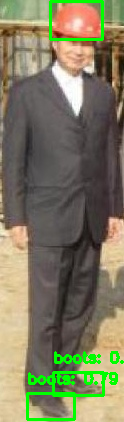


0: 640x224 1 hard-hat, 2 bootss, 176.9ms
Speed: 1.8ms preprocess, 176.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 224)


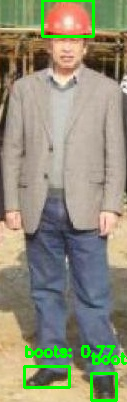


0: 640x224 1 hard-hat, 161.5ms
Speed: 1.7ms preprocess, 161.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 224)


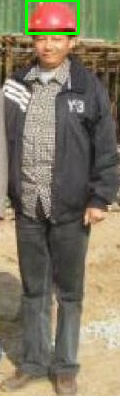

In [22]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# Load the custom YOLO model for PPE detection
ppe_model = YOLO('/content/drive/MyDrive/datasets/best.pt')  # Path to the trained model for PPE detection

# Function to perform PPE detection
def detect_ppe(image, model):
    results = model(image)
    detections = results[0].boxes.xyxy.cpu().numpy()  # Extract the bounding boxes
    confidences = results[0].boxes.conf.cpu().numpy()  # Extract the confidences
    labels = results[0].boxes.cls.cpu().numpy()  # Extract the class labels
    return detections, confidences, labels

# Function to draw detections on an image
def draw_detections(image, detections, confidences, labels, model):
    for i in range(len(detections)):
        x1, y1, x2, y2 = map(int, detections[i])
        confidence = float(confidences[i])
        label = int(labels[i])

        color = (0, 255, 0) if label != 0 else (255, 0, 0)  # Green for PPE, Blue for person
        label_name = model.names[label]

        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, f'{label_name}: {confidence:.2f}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return image

# Define paths for PPE detection images
ppe_image_paths = [
    '/content/drive/MyDrive/datasets/cropped_1.jpg',  # Replace with the actual path to your PPE detection image
    '/content/drive/MyDrive/datasets/cropped_2.jpg',  # Replace with the actual path to your PPE detection image
    '/content/drive/MyDrive/datasets/cropped_3.jpg'   # Replace with the actual path to your PPE detection image
]

# Perform PPE detection on each image and display the results
for ppe_image_path in ppe_image_paths:
    try:
        ppe_image = cv2.imread(ppe_image_path)
        if ppe_image is None:
            raise ValueError(f"Failed to load image at {ppe_image_path}")

        ppe_detections, ppe_confidences, ppe_labels = detect_ppe(ppe_image, ppe_model)
        ppe_result = draw_detections(ppe_image, ppe_detections, ppe_confidences, ppe_labels, ppe_model)

        # Display the result
        cv2_imshow(ppe_result)
    except ValueError as e:
        print(e)



0: 640x192 1 person, 146.2ms
Speed: 1.7ms preprocess, 146.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 192)

0: 640x192 1 person, 83.7ms
Speed: 1.6ms preprocess, 83.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 192)


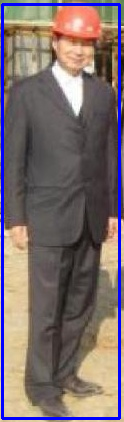

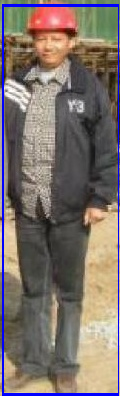

In [12]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO('/content/drive/MyDrive/datasets/yolov8n.pt')  # Path to the trained combined model

# Function to perform detection on an image
def detect_objects(image):
    results = model(image)
    detections = results[0].boxes.xyxy.cpu().numpy()  # Extract the bounding boxes
    confidences = results[0].boxes.conf.cpu().numpy()  # Extract the confidences
    labels = results[0].boxes.cls.cpu().numpy()  # Extract the class labels
    return detections, confidences, labels

# Function to draw detections on an image
def draw_detections(image, detections, confidences, labels, model):
    for i in range(len(detections)):
        x1, y1, x2, y2 = map(int, detections[i])
        confidence = float(confidences[i])
        label = int(labels[i])

        color = (0, 255, 0) if label != 0 else (255, 0, 0)  # Green for PPE, Blue for person
        label_name = model.names[label]

        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, f'{label_name}: {confidence:.2f}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return image

# Function to perform person detection and then PPE detection on the detected persons
def process_images(person_image_path, ppe_image_path):
    person_image = cv2.imread(person_image_path)
    ppe_image = cv2.imread(ppe_image_path)

    # Person Detection
    person_detections, person_confidences, person_labels = detect_objects(person_image)
    person_image_annotated = draw_detections(person_image, person_detections, person_confidences, person_labels, model)

    # Process each detected person for PPE detection
    for i in range(len(person_detections)):
        x1, y1, x2, y2 = map(int, person_detections[i])
        label = int(person_labels[i])

        if label == 0:  # Assuming 'person' class is labeled as 0
            # Crop the person region from the PPE image
            person_crop = ppe_image[y1:y2, x1:x2]

            # PPE Detection on the cropped person image
            ppe_detections, ppe_confidences, ppe_labels = detect_objects(person_crop)
            person_crop_annotated = draw_detections(person_crop, ppe_detections, ppe_confidences, ppe_labels, model)

            # Replace the cropped region in the original PPE image with annotated crop
            ppe_image[y1:y2, x1:x2] = person_crop_annotated

    return person_image_annotated, ppe_image

# Define paths for person detection image and PPE detection image
person_image_path = '/content/drive/MyDrive/datasets/cropped_1.jpg'  # Replace with the actual path to your person detection image
# Replace with the actual path to your PPE detection image

# Perform detection
person_result, ppe_result = process_images(person_image_path, ppe_image_path)

# Display the results
cv2_imshow(person_result)
cv2_imshow(ppe_result)
